In [4]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time
import h5py
from tqdm import tqdm
import cv2

from hydra.model.smc import SMC
from hydra.model.shell import Shell
from hydra.model.layer import Layer
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
from hydra.model.fluo_encoder import FluoEncoder
from hydra.model import plot
import hydra.model.helper as helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
FILENAME = "2020-08-04-22-33-30-043183"
METAPATH = "./results/data/meta.txt"

# Load metadata
data = pd.read_csv(METAPATH, sep="\s+")
print(data.Metadata[data.Filename == FILENAME].values[0])

numx=30,numy=60,gc=1000,gip3=0.1,gip3x=0.1,gip3y=2.0,sparsity=0.02,seed=1112,T=300.0,dt=0.0002,k_ipr=0.2,s0=100,d=0.002,v_delta=0.03,k_deg=0.15,shell


In [6]:
# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 60, 60)

In [7]:
calcium.shape

(15000, 60, 60)

In [20]:
calcium = calcium[5000:]

In [77]:
# # Plot calcium patterns at specified times
# plot.plot_frame_patterns(calcium[:,:200,:], list(np.arange(0, 50, 5)), vmin=0, vmax=1, dt=0.02)

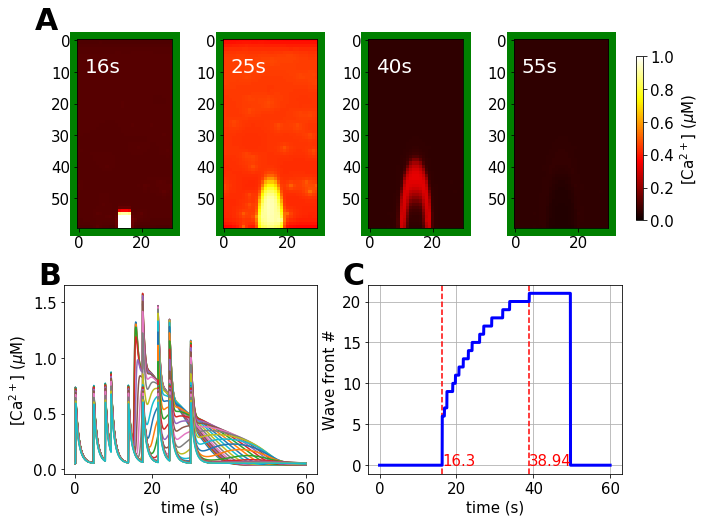

In [47]:
plot.plot_slowwave_stills(calcium[:,:30,:], [16, 25, 40, 55], 0.0002*100, save_fig=True, save_path="./results/figures/simulate-bend-wave.png")